Time to create a chatbot with some memory:

- Use different message types (HumasMessage and AIMessage)
- Maintain a full conversation history using both message types
- Create a sophisticated conversation loop

In [46]:
from typing import TypedDict, List, Union
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph, START, END

from dotenv import load_dotenv
import os
load_dotenv()

GOOGLE_API_KEY = os.getenv("GOOGLE_GENAI_API_TOKEN")

In [47]:
# AIMessage, HumanMessage are data types in langchain

class AgentState(TypedDict):
    messages: List[Union[AIMessage, HumanMessage]] 




In [48]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",  # o "gemini-1.5-pro" si tienes acceso
    temperature=0,
    google_api_key=GOOGLE_API_KEY
)

In [49]:
def process(state:AgentState) -> AgentState:
    """
    This node will solve the request to the input
    In this case we appen the messages from the LLM to the list of messages
    """
    response = llm.invoke(state["messages"])
    state["messages"].append(AIMessage(content = response.content))
    print(f"\nAI: {response.content}")
    print("CURRENT STATE: ", state["messages"])
    return state

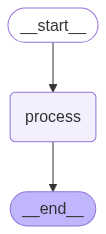

In [50]:
graph = StateGraph(AgentState)
graph.add_node("process", process)
graph.add_edge(START, "process")
graph.add_edge("process", END)

agent = graph.compile()

from IPython.display import Image, display
display(Image(agent.get_graph().draw_mermaid_png()))


In [51]:
conversation_history = []

In [52]:
user_input = input("Enter: ")
while user_input != "exit":
    conversation_history.append(HumanMessage(content=user_input))
    result = agent.invoke({"messages":conversation_history})
    print(result["messages"])
    conversation_history = result["messages"]
    user_input = input("Enter: ")


KeyboardInterrupt: Interrupted by user

Ways to keep conversation history along different sessions

In [ ]:
with open("02_agent_logging.txt", "w") as f:
    f.write("Your conversation log:\n")

    for message in conversation_history:
        if isinstance(message,HumanMessage):
            f.write(f"You: {message.content}\n")

        elif isinstance(message,AIMessage):
            f.write(f"AI: {message.content}\n\n")

    f.write("End of the conversation")

print("Conversation saved to logging.txt")        

Conversation saved to logging.txt


Way to optimize the prompt sent back to the AI with the history? Remove first rows of the .txt